In [4]:
import matplotlib.pyplot as plt
import re
from operator import itemgetter 

In [19]:
# lr, hidden_dim, depth, params, dropout1, droput2, loss
data = None
with open("observations/analytics.txt", "r") as file:
    data = file.readlines()

In [22]:
run = list(map(list, [itemgetter(2, 3, 4, -1)(re.findall(r"[-+]?\d*\.\d+|\d+", line)) for line in data]))
for i in range(len(run)):
    for j in range(len(run[0])):
        if run[i][j].isdigit():
            run[i][j] = int(run[i][j])
        else:
            run[i][j] = float(run[i][j])

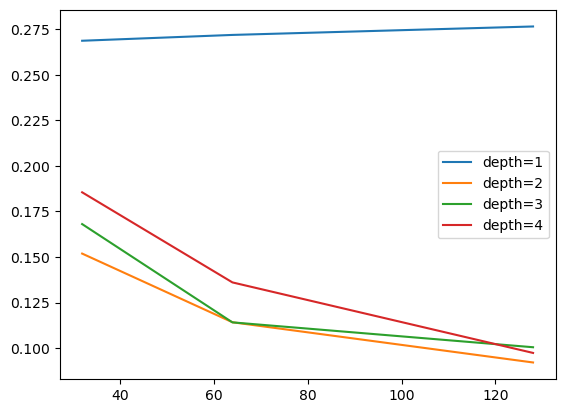

In [10]:
# See how loss changes with width for each depth
for i in range(1, 5):
    same_depth = list(filter(lambda x: x[1] == i, run))
    plt.plot([row[0] for row in same_depth], [row[-1] for row in same_depth], label=f"depth={i}")
plt.legend()
plt.show()

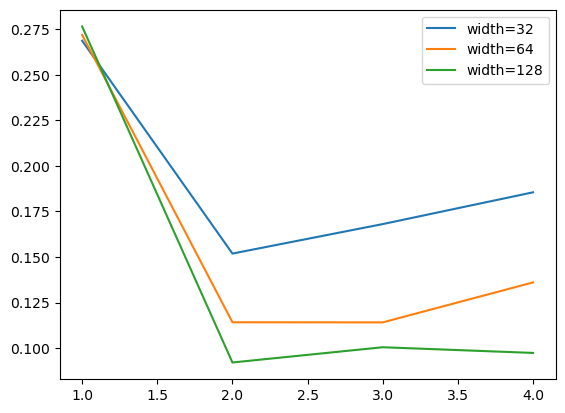

In [11]:
# See how loss changes with depth for each width
for i in [32, 64, 128]:
    same_width = list(filter(lambda x: x[0] == i, run))
    plt.plot([row[1] for row in same_width], [row[-1] for row in same_width], label=f"width={i}")
plt.legend()
plt.show()

In [12]:
# See how loss changes with the number of parameters
second_array = [sublist[2] for sublist in run]
third_array = [sublist[3] for sublist in run]
sorted_indexes = sorted(range(len(second_array)), key=lambda i: second_array[i])
second_array_sorted = [second_array[i] for i in sorted_indexes]
third_array_sorted = [third_array[i] for i in sorted_indexes]

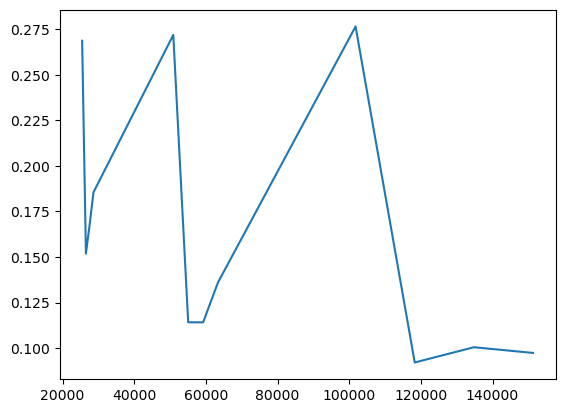

In [13]:
plt.plot(second_array_sorted, third_array_sorted)

In [24]:
sorted(run, key=lambda i: i[-1])

[[128, 2, 118282, 0.09210540033458842],
 [128, 4, 151306, 0.09734604065411091],
 [128, 3, 134794, 0.1004688452990209],
 [64, 3, 59210, 0.114113147788571],
 [64, 2, 55050, 0.11417185086083745],
 [64, 4, 63370, 0.13604517474619168],
 [32, 2, 26506, 0.1518687878243667],
 [32, 3, 27562, 0.16805672883662356],
 [32, 4, 28618, 0.18549601581712333],
 [32, 1, 25450, 0.2686693976951626],
 [64, 1, 50890, 0.2718643830604137],
 [128, 1, 101770, 0.27650020467028164]]